# <center style="color:red">Boston Marathon 2014 </center>

# Import some necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
import pickle
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (15, 5)
warnings.simplefilter(action="ignore")
pd.set_option("display.max_columns",None)
%matplotlib inline

In [2]:
data = pd.read_csv('runners.csv')

# At first glance

In [3]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
r0=(float(data.shape[0]))
print('Dataframe dimensions:', data.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (31984, 21)


,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
column type,object,object,int64,object,object,int64,float64,object,int64,object,object,int64,float64,object,object,object,object,object,object,object,object
null values (nb),0,0,0,0,0,0,0,0,0,30740,0,0,0,2576,0,0,0,0,0,1,0
null values (%),0,0,0,0,0,0,0,0,0,96.1106,0,0,0,8.05403,0,0,0,0,0,0.00312656,0


    In general,our data dont have much missing values. 
    The number of columns are "object" datatype quite a lot. 
    These cols such as 5k,10k,15k,20k,half,25k,30k,35k,40k can convert to numeric

# Delete timing rows have invalid values

In [5]:
data[['5k','10k','half','20k','25k','30k','40k']].tail(10)

,5k,10k,half,20k,25k,30k,40k
31974,35.63,76.45,183.28,166.43,-,279.47,-
31975,37.72,75.80,170.82,162.13,-,268.23,366.37
31976,31.60,63.95,135.50,128.43,161.75,200.45,275.02
31977,29.82,63.33,136.98,130.45,165.40,208.53,286.62
31978,37.10,76.75,173.45,163.78,210.07,257.60,352.18
31979,26.13,50.72,104.78,99.55,124.02,148.65,200.22
31980,31.07,61.28,135.85,128.37,165.02,203.43,285.47
31981,28.18,59.00,130.57,123.33,157.02,192.65,266.30
31982,30.98,63.75,137.03,129.90,167.82,207.52,285.87
31983,26.92,53.63,114.13,108.03,135.02,161.83,216.48


We can see some cells contain Nan value by containing "-". I am gonna delete all those rows

In [6]:
data.drop(data[data['10k']=='-'].index, axis=0, inplace=True)
data.drop(data[data['25k']=='-'].index, axis=0, inplace=True)
data.drop(data[data['35k']=='-'].index, axis=0, inplace=True)
data.drop(data[data['30k']=='-'].index, axis=0, inplace=True)
data.drop(data[data['half']=='-'].index, axis=0, inplace=True)
data.drop(data[data['20k']=='-'].index, axis=0, inplace=True)
data.drop(data[data['40k']=='-'].index, axis=0, inplace=True)
data.drop(data[data['5k']=='-'].index, axis=0, inplace=True)
r1=(float(data.shape[0]))
print("The number of rows after deleting those rows containing '-': {} /31984 in total".format(int(r0-r1)))

The number of rows after deleting those rows containing '-': 335 /31984 in total


# Types of Datatype

In [7]:
data.drop(['bib','ctz','name'],axis=1, inplace=True) # irrelavant features

In [8]:
numeric = ['10k','25k','age','official','35k','overall','pace','30k','5k','half','20k','40k']
data[numeric] = data[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)

# Histograms and Density Plots 

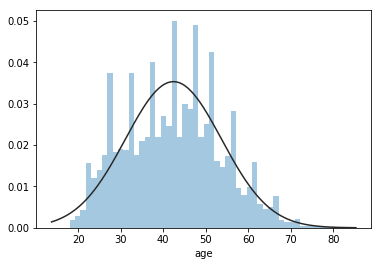

In [9]:
from scipy.stats import norm
sns.distplot(data.age,fit=norm, kde=False)

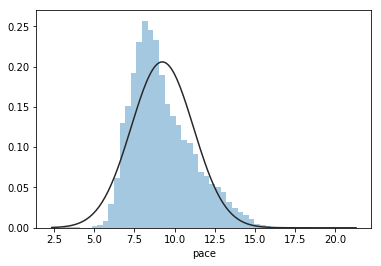

In [10]:
from scipy.stats import norm
sns.distplot(data.pace,fit=norm, kde=False)

The majority competitors who participates the competition is distributed from 38 to 52 year old

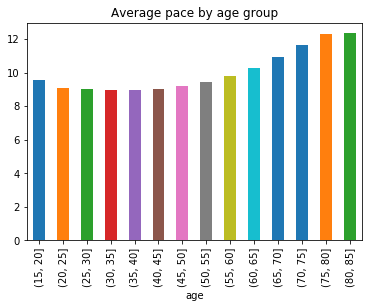

In [11]:
data['pace'].groupby(pd.cut(data['age'], range(15,90,5))).aggregate(np.average).plot(kind="bar", title="Average pace by age group")

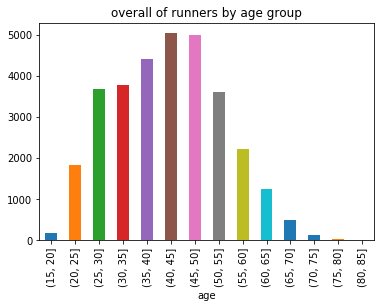

In [12]:
data['overall'].groupby(pd.cut(data['age'], range(15,90,5))).aggregate(len).plot(kind="bar", title="overall of runners by age group")

# Handling missing values - One Hot Encode - Standardscaler

2546


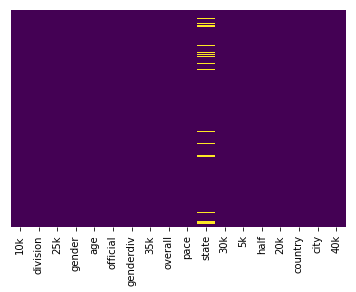

In [13]:
print(data.state.isnull().sum())
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There is nearly not having missing values except ctz column which has 96.1106% missing values in total. My solution is dropping this col. 

In [14]:
data.dropna(axis=0, how='any', inplace=True)

In [15]:
dfgender= pd.get_dummies(data.gender, drop_first=True)
dfcountry = pd.get_dummies(data.country, drop_first=True)
data.drop(['country','gender','state','city'],axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
X_Scale = scaler.fit_transform(data)

In [17]:
data = data.join(dfgender)
data = data.join(dfcountry)

In [18]:
print(data.shape)
data.head(3)

(29103, 16)


,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,M,USA
9,30.48,20,77.68,31.0,137.83,20,112.27,20.0,5.27,94.78,15.15,65.23,61.78,129.83,1,1
14,17.12,13,48.88,29.0,87.40,13,72.83,13.0,3.35,60.82,8.02,40.20,38.02,82.38,1,0
15,33.93,10,85.03,30.0,143.90,10,119.68,46.0,5.50,102.40,16.92,71.68,67.92,136.47,0,1


In [19]:
data[['10k','division','25k','age','official','genderdiv','35k','overall','pace','30k','5k','half','20k','40k']] = X_Scale

In [20]:
data.head(2)

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,M,USA
9,0.140248,0.002723,0.121138,0.206349,0.116747,0.001081,0.109485,0.000595,0.116628,0.110578,0.090333,0.127399,0.127516,0.115959,1,1
14,0.000000,0.001720,0.001372,0.174603,0.005682,0.000683,0.005284,0.000376,0.005774,0.003316,0.000000,0.000000,0.000000,0.005138,1,0


# Determining the optimal number of clusters

## Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
for n_clusters in  range(2,6):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

Runtime died :(

## Elbow Analysis

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

In [21]:
cluster_range = range( 1, 20 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(data)
    cluster_errors.append( clusters.inertia_)

In [22]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors":cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,19523.187556
1,2,11836.803081
2,3,8491.394493
3,4,6349.896940
4,5,5079.953724
5,6,4417.833500
6,7,3785.982529
7,8,3232.589558
8,9,2889.859419
9,10,2575.685247


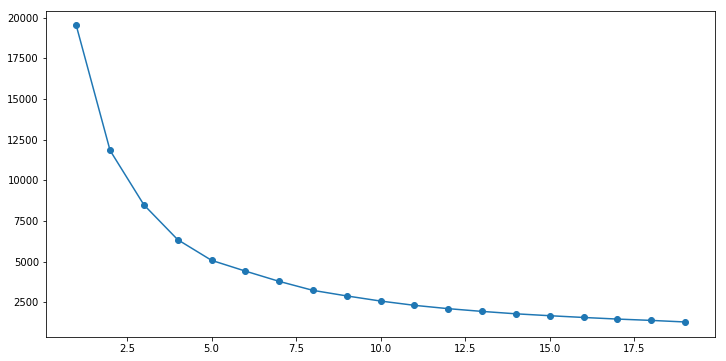

In [23]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

The elbow diagram shows that the gain in explained variance reduces significantly from 2 to 3. So, optimal number of clusters could either 2 or 3. 


* The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
* The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
* If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
* The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

# Clustering with K-means

In [24]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2, random_state=42).fit(data)
kmean.labels_

array([1, 1, 0, ..., 0, 0, 1])

In [25]:
data['Group'] = kmean.labels_

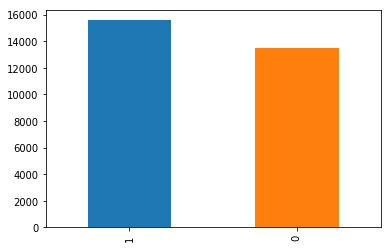

In [26]:
data.Group.value_counts().plot(kind='bar')

In [27]:
grouped_data = data.groupby('Group').mean()

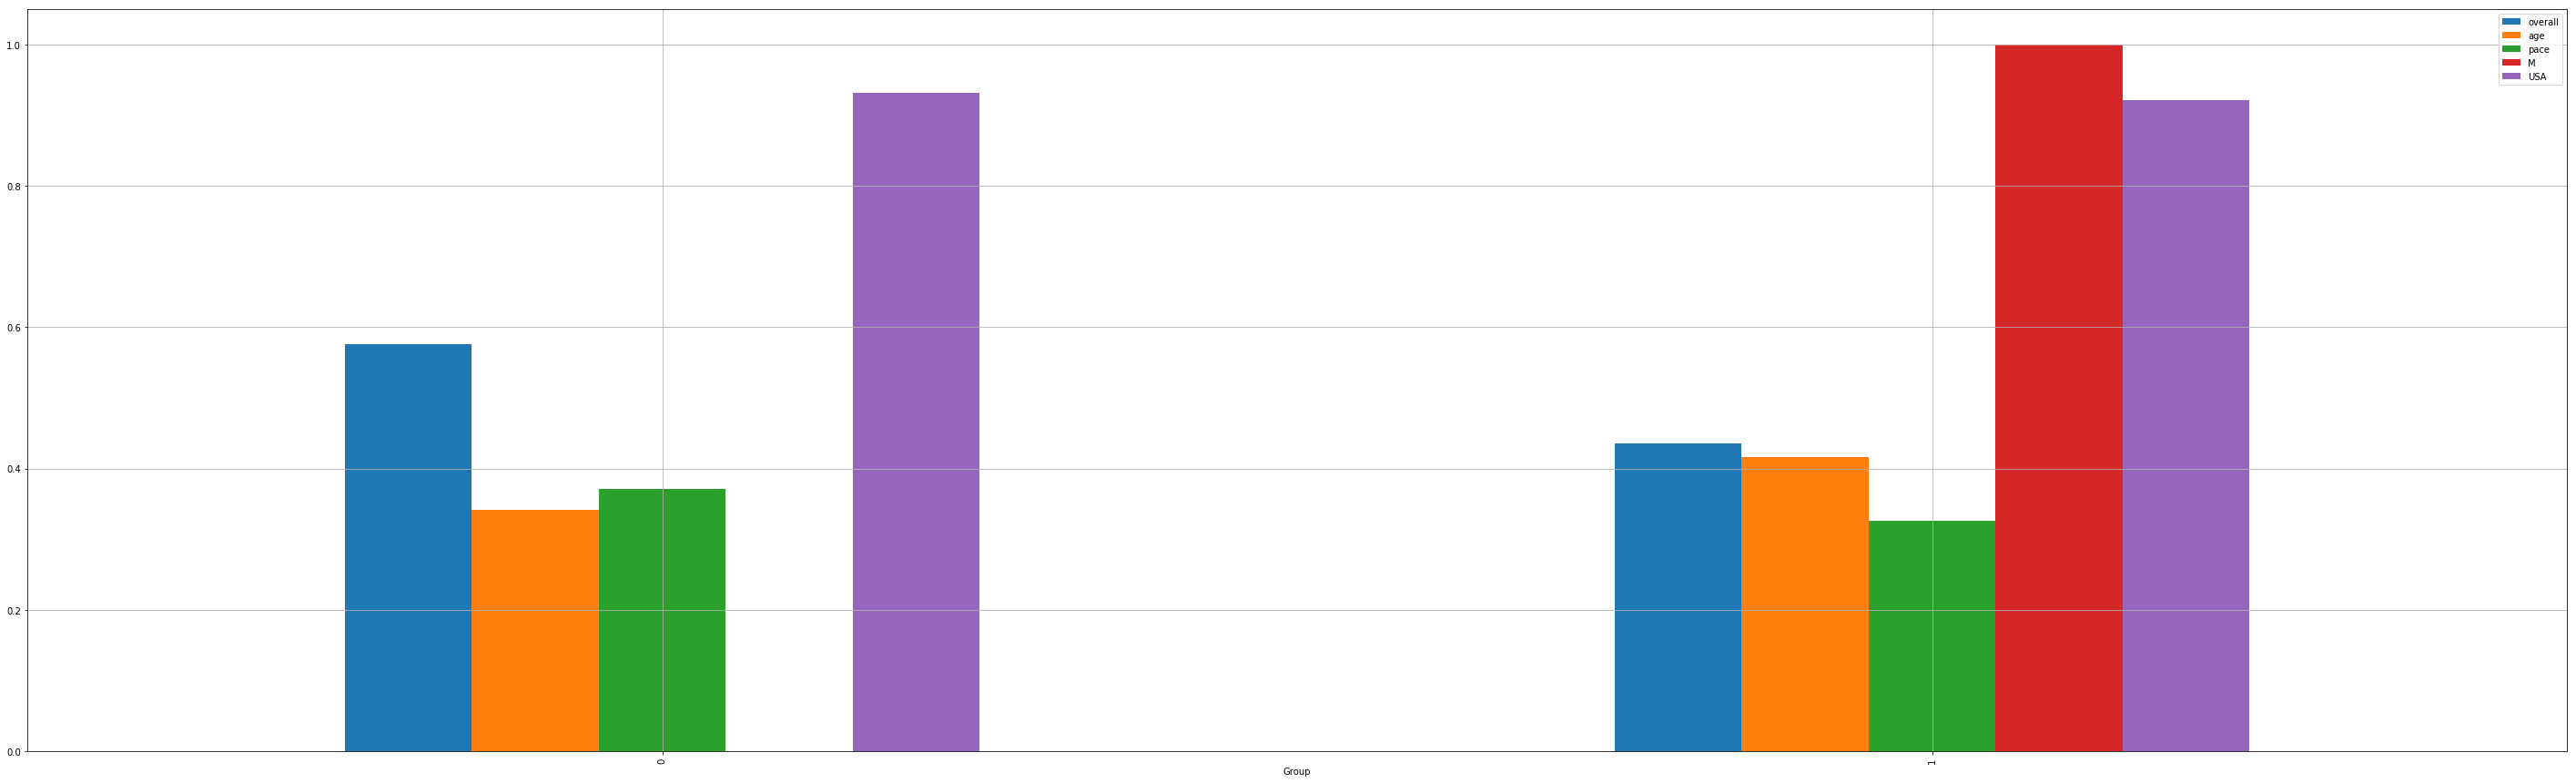

In [28]:
grouped_data[['overall','age','pace','M','USA']].plot.bar(figsize=(50,15),grid=True)

##### Conclusion: After plotting the clusters, We can get some insights like this: the rate of female Americans having overall point and pace in marathon competition are higher than male Americans with the condition that the average of age is lower